In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import os
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
from matplotlib.ticker import FormatStrFormatter
from pyproj import Proj, transform
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.transforms import Bbox
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin
from rasterstats import zonal_stats


def cmap_internet():
    # Data for colormap:
    cm_data = np.array([
    [0.0235, 0.0118, 0.4235],[0.0314, 0, 0.4627],[0.051, 0, 0.4549],[0.0667, 0.0078, 0.4588],[0.0824, 0.0078, 0.4627],[0.0902, 0.0118, 0.4667],[0.1059, 0.0157, 0.4627],[0.1216, 0.0235, 0.4706],[0.1333, 0.0196, 0.4706],[0.1451, 0.0275, 0.4863],[0.1647, 0.0314, 0.4784],[0.1725, 0.0392, 0.4824],[0.1922, 0.0392, 0.4902],[0.2, 0.0471, 0.4863],[0.2157, 0.051, 0.4902],[0.2353, 0.051, 0.502],[0.2431, 0.0549, 0.4863],[0.2588, 0.0627, 0.498],[0.2784, 0.0667, 0.4941],[0.2863, 0.0667, 0.498],[0.3059, 0.0745, 0.5059],[0.3098, 0.0784, 0.5098],[0.3255, 0.0824, 0.502],[0.3373, 0.0863, 0.5176],[0.3529, 0.0941, 0.5216],[0.3608, 0.098, 0.5137],[0.3765, 0.1059, 0.5216],[0.3882, 0.1059, 0.5255],[0.4, 0.1098, 0.5255],[0.4196, 0.1176, 0.5333],[0.4353, 0.1137, 0.5333],[0.4431, 0.1216, 0.5255],[0.4627, 0.1294, 0.5333],[0.4706, 0.1294, 0.5294],[0.4863, 0.1333, 0.5373],[0.5059, 0.1373, 0.5412],[0.5176, 0.1373, 0.5412],[0.5294, 0.1451, 0.5412],[0.5451, 0.149, 0.549],[0.5569, 0.1569, 0.5529],[0.5686, 0.1608, 0.5529],[0.5804, 0.1647, 0.5529],[0.6039, 0.1647, 0.5647],[0.6196, 0.1686, 0.5608],[0.6275, 0.1725, 0.5608],[0.6471, 0.1804, 0.5608],[0.6588, 0.1804, 0.5647],[0.6627, 0.1882, 0.5608],[0.6824, 0.1882, 0.5647],[0.702, 0.1922, 0.5725],[0.7137, 0.2, 0.5725],[0.7255, 0.2, 0.5765],[0.7451, 0.2078, 0.5804],[0.749, 0.2157, 0.5765],[0.7608, 0.2235, 0.5843],[0.7725, 0.2275, 0.5882],[0.7882, 0.2235, 0.5961],[0.8, 0.2314, 0.6],[0.8157, 0.2353, 0.6],[0.8235, 0.2392, 0.6],[0.8431, 0.2392, 0.6157],[0.8549, 0.2471, 0.6078],[0.8706, 0.251, 0.6196],[0.8902, 0.2471, 0.6196],[0.902, 0.2549, 0.6235],[0.9176, 0.2588, 0.6235],[0.9255, 0.2627, 0.6275],[0.9373, 0.2667, 0.6275],[0.9569, 0.2745, 0.6314],[0.9686, 0.2784, 0.6392],[0.9647, 0.2863, 0.6392],[0.9725, 0.298, 0.6275],[0.9765, 0.3098, 0.6157],[0.9686, 0.3137, 0.6157],[0.9725, 0.3294, 0.6157],[0.9765, 0.3333, 0.6118],[0.9882, 0.3451, 0.6078],[0.9804, 0.3529, 0.6078],[0.9843, 0.3608, 0.5882],[0.9804, 0.3725, 0.5843],[0.9804, 0.3843, 0.5843],[0.9804, 0.3922, 0.5882],[0.9843, 0.4, 0.5804],[0.9804, 0.4118, 0.5725],[0.9725, 0.4235, 0.5608],[0.9804, 0.4275, 0.5608],[0.9882, 0.4353, 0.5529],[0.9843, 0.4471, 0.5569],[0.9765, 0.4549, 0.5451],[0.9804, 0.4706, 0.5412],[0.9804, 0.4784, 0.5294],[0.9804, 0.4941, 0.5333],[0.9843, 0.498, 0.5255],[0.9882, 0.5059, 0.5255],[0.9882, 0.5098, 0.5216],[0.9882, 0.5176, 0.5176],[0.9922, 0.5294, 0.5216],[0.9961, 0.5333, 0.5137],[0.9922, 0.549, 0.5137],[0.9922, 0.5608, 0.5098],[0.9922, 0.5686, 0.5098],[0.9922, 0.5804, 0.502],[0.9882, 0.5922, 0.4941],[0.9922, 0.5961, 0.4824],[0.9961, 0.6118, 0.4863],[1, 0.6157, 0.4824],[0.9922, 0.6235, 0.4745],[0.9961, 0.6353, 0.4745],[1, 0.6431, 0.4667],[0.9922, 0.6549, 0.4549],[0.9922, 0.6667, 0.4549],[0.9882, 0.6706, 0.4549],[0.9961, 0.6902, 0.4471],[0.9922, 0.6941, 0.4392],[0.9961, 0.702, 0.4431],[0.9961, 0.7098, 0.4353],[0.9922, 0.7255, 0.4275],[0.9961, 0.7333, 0.4235],[1, 0.7451, 0.4235],[1, 0.7451, 0.4118],[0.9882, 0.7647, 0.4118],[0.9922, 0.7765, 0.4039],[0.9961, 0.7843, 0.3961],[1, 0.7804, 0.3608]
    ])
    cmap = LinearSegmentedColormap.from_list("internet", cm_data)
    return cmap

def cmap_oslo():
    # Data for colormap:
    cm_data = np.array([
    [0.003670408, 0.005082388, 0.002453649],[0.005662642, 0.009394417, 0.010694514],[0.007673677, 0.013900263, 0.019153884],[0.00970794, 0.018228235, 0.027418159],[0.011980919, 0.022573088, 0.035903564],[0.014040477, 0.026934897, 0.043974731],[0.016150192, 0.031315305, 0.051380285],[0.018293923, 0.035926833, 0.058122519],[0.020472811, 0.040332956, 0.064433388],[0.022689486, 0.044608038, 0.070257434],[0.024946606, 0.048671736, 0.075728032],[0.027246732, 0.052453011, 0.080952408],[0.029592219, 0.05624038, 0.08583651],[0.031983696, 0.059842442, 0.090619432],[0.03447724, 0.063258368, 0.095162704],[0.037056633, 0.066552774, 0.099530295],[0.039346361, 0.069830373, 0.103998364],[0.041491926, 0.072992601, 0.10847631],[0.04323844, 0.076021634, 0.113096779],[0.045050614, 0.079043698, 0.117653287],[0.046508295, 0.082101942, 0.122269949],[0.047783816, 0.084963764, 0.126971555],[0.04903505, 0.087852623, 0.131740452],[0.049924638, 0.090659738, 0.136487129],[0.05067059, 0.093388431, 0.141349411],[0.051244775, 0.096125944, 0.146190615],[0.051698386, 0.09892071, 0.151076753],[0.052159957, 0.101711027, 0.156034992],[0.05263203, 0.10450935, 0.160983288],[0.053115297, 0.107414736, 0.165953051],[0.053611994, 0.110322495, 0.170990886],[0.054125237, 0.113244551, 0.176024489],[0.054654996, 0.116178102, 0.18112214],[0.055200857, 0.119133041, 0.1862655],[0.05577693, 0.122093297, 0.191398925],[0.0563842, 0.125156296, 0.196606245],[0.056955085, 0.128228497, 0.201776816],[0.057498123, 0.131313475, 0.207042749],[0.058135986, 0.134437068, 0.212303282],[0.058866563, 0.13757399, 0.217588117],[0.059600819, 0.14073249, 0.222913393],[0.060280684, 0.143905518, 0.228260374],[0.060942946, 0.147106057, 0.233598735],[0.061698825, 0.150350275, 0.239005489],[0.062585236, 0.153582948, 0.244412961],[0.063380873, 0.156879716, 0.249856356],[0.064199032, 0.160147335, 0.255348819],[0.065066734, 0.163519546, 0.260829442],[0.065965499, 0.166855225, 0.266347708],[0.066905695, 0.170203315, 0.271860652],[0.067879524, 0.173571886, 0.277439349],[0.068913004, 0.176974547, 0.283021396],[0.069886534, 0.180376824, 0.288612454],[0.070923621, 0.183812909, 0.294222637],[0.071974075, 0.187281445, 0.299872474],[0.07311768, 0.190722754, 0.305543011],[0.07422219, 0.194231424, 0.311213122],[0.075341209, 0.197696336, 0.316910479],[0.076503074, 0.20118566, 0.322635468],[0.077709283, 0.204732409, 0.32836162],[0.07895913, 0.208255544, 0.334121632],[0.080254793, 0.211814271, 0.339892197],[0.081609406, 0.215345643, 0.345665567],[0.082886932, 0.218921406, 0.351474549],[0.084299075, 0.222493896, 0.357308748],[0.085598287, 0.226090294, 0.363129949],[0.087109394, 0.229650201, 0.368991688],[0.08852901, 0.233251857, 0.374855793],[0.090014643, 0.236896067, 0.380746595],[0.091563619, 0.240476167, 0.386631042],[0.093033375, 0.244101509, 0.392549751],[0.094704148, 0.247757809, 0.398482321],[0.096247667, 0.251395435, 0.404417973],[0.097978802, 0.255038801, 0.410388305],[0.09964187, 0.258671762, 0.41634896],[0.101383268, 0.262321065, 0.422323092],[0.103202829, 0.26598433, 0.42832791],[0.104970868, 0.269646995, 0.434330808],[0.106919337, 0.273307582, 0.440352813],[0.108794222, 0.276973846, 0.446385631],[0.110796068, 0.280624088, 0.452440305],[0.112828918, 0.284308506, 0.458486223],[0.114835618, 0.287987584, 0.464562064],[0.116986437, 0.291686627, 0.470635092],[0.119187675, 0.295360264, 0.476720686],[0.121395908, 0.299066467, 0.482819061],[0.123708342, 0.302746338, 0.488928846],[0.126126125, 0.306472087, 0.495055592],[0.128540791, 0.310183342, 0.501188257],[0.131066254, 0.313894075, 0.507326626],[0.133636645, 0.317616205, 0.513481526],[0.136253006, 0.321349418, 0.519639641],[0.138999391, 0.325089874, 0.525817477],[0.141836364, 0.328866383, 0.532001939],[0.144743931, 0.332645315, 0.538201527],[0.147724388, 0.336416678, 0.544400167],[0.15078773, 0.340234565, 0.550616209],[0.153953661, 0.344048992, 0.556845521],[0.157229104, 0.347913608, 0.563082854],[0.160607346, 0.35177853, 0.569319338],[0.16413346, 0.355698612, 0.575583373],[0.167706204, 0.359624174, 0.581839953],[0.171419477, 0.36358659, 0.588109191],[0.175264994, 0.367587143, 0.594392097],[0.179225642, 0.371628739, 0.600673666],[0.183304827, 0.375717634, 0.606965874],[0.187564871, 0.379846383, 0.613241566],[0.191893641, 0.384020204, 0.61953483],[0.196416664, 0.388241374, 0.625804401],[0.201015395, 0.392510875, 0.632071728],[0.205826725, 0.396828919, 0.638320235],[0.210739245, 0.401218, 0.644544052],[0.215817232, 0.405645681, 0.650747941],[0.221030234, 0.410127153, 0.656915039],[0.226371938, 0.414649222, 0.66303617],[0.23185454, 0.419234257, 0.669101483],[0.237473714, 0.423854124, 0.675105026],[0.243179979, 0.428531653, 0.681034185],[0.249055348, 0.433240409, 0.686890152],[0.255035701, 0.437997581, 0.69265344],[0.261091203, 0.442773356, 0.698295457],[0.267238891, 0.447562638, 0.703832538],[0.273507975, 0.452397909, 0.709242145],[0.279816259, 0.457215013, 0.714499054],[0.286168369, 0.462048502, 0.719618843],[0.292592066, 0.466878681, 0.724569323],[0.299049151, 0.471692736, 0.729348055],[0.305518182, 0.476476766, 0.733948193],[0.311961495, 0.481232483, 0.738357202],[0.318440338, 0.485956321, 0.742578385],[0.324875679, 0.490645856, 0.746591295],[0.331287705, 0.495266428, 0.750404939],[0.337672418, 0.499826735, 0.754011834],[0.343988325, 0.504348273, 0.757408534],[0.350271606, 0.508783903, 0.760601499],[0.356472994, 0.513144025, 0.763583869],[0.362597447, 0.517440536, 0.766368705],[0.368661838, 0.521642477, 0.768950306],[0.374637512, 0.525784341, 0.771348301],[0.380535682, 0.529840051, 0.773545896],[0.386338, 0.533806809, 0.775570828],[0.392077912, 0.537715743, 0.777426972],[0.397732078, 0.541523266, 0.779107516],[0.403303227, 0.54527564, 0.780636471],[0.408789541, 0.548950608, 0.782021398],[0.414204336, 0.552547828, 0.783259555],[0.419551368, 0.556072043, 0.784376498],[0.424822806, 0.559551132, 0.785364012],[0.430026232, 0.56296424, 0.786242973],[0.435177106, 0.566312942, 0.787015529],[0.440254791, 0.569606949, 0.787686898],[0.445286441, 0.572867371, 0.788275442],[0.450271965, 0.57607588, 0.788785205],[0.455212081, 0.579234357, 0.789217916],[0.460097947, 0.582351609, 0.789581766],[0.464960743, 0.585450858, 0.789884877],[0.46979168, 0.58849676, 0.790133602],[0.474581738, 0.591533744, 0.790333167],[0.479344778, 0.594534536, 0.790488499],[0.484077066, 0.597517124, 0.790604252],[0.488801133, 0.600473958, 0.79068478],[0.493499377, 0.603419979, 0.790734126],[0.498197293, 0.606340578, 0.790756027],[0.502852198, 0.60925996, 0.79075393],[0.507519303, 0.612153181, 0.790731014],[0.512163679, 0.615042252, 0.790690209],[0.51680944, 0.617927186, 0.790634223],[0.521439341, 0.620809209, 0.790565568],[0.526076266, 0.623680595, 0.790486581],[0.530700221, 0.626540471, 0.790399449],[0.535320595, 0.629403414, 0.790306232],[0.539944427, 0.632270039, 0.790208883],[0.544572918, 0.635131045, 0.790109272],[0.549201534, 0.637996556, 0.790009202],[0.553823706, 0.640860832, 0.789910431],[0.558449735, 0.643729647, 0.789814691],[0.563097461, 0.646609165, 0.789723697],[0.56773374, 0.649492755, 0.789639159],[0.572383333, 0.652375812, 0.789562824],[0.577036542, 0.655270173, 0.789496497],[0.581693058, 0.658180312, 0.789442055],[0.586367946, 0.661092941, 0.78940146],[0.591046735, 0.664025953, 0.789376772],[0.595738898, 0.666963629, 0.789370158],[0.600443041, 0.669929127, 0.789383893],[0.605160312, 0.672903835, 0.789420374],[0.609891669, 0.675893717, 0.789482126],[0.614636145, 0.678905994, 0.789571817],[0.619411196, 0.681940613, 0.789692284],[0.62419137, 0.68500704, 0.789846584],[0.628989834, 0.688095968, 0.790038007],[0.633816093, 0.691207385, 0.790269958],[0.63865685, 0.694353389, 0.79054594],[0.643522512, 0.697537424, 0.790869519],[0.648417463, 0.700757996, 0.791244344],[0.653336191, 0.704010808, 0.79167434],[0.658290032, 0.707306721, 0.792163662],[0.663272922, 0.710647256, 0.792717086],[0.668281372, 0.714028269, 0.793339387],[0.673322033, 0.717467779, 0.794030877],[0.678396941, 0.72094278, 0.794794446],[0.683508095, 0.724483538, 0.795640217],[0.688661574, 0.728073522, 0.796572026],[0.693840305, 0.731726165, 0.797594696],[0.69906641, 0.735436684, 0.798713149],[0.704334306, 0.73921636, 0.799929723],[0.709643452, 0.743052374, 0.801240862],[0.714987397, 0.746953835, 0.802662074],[0.720375702, 0.750930337, 0.80419794],[0.725810918, 0.754971365, 0.805840612],[0.731277424, 0.759078743, 0.807605742],[0.736793792, 0.763262692, 0.809490406],[0.742352236, 0.767518971, 0.811496345],[0.747950311, 0.771853663, 0.813624577],[0.753582289, 0.776256434, 0.815889749],[0.759256633, 0.780731364, 0.818274073],[0.764976225, 0.785283592, 0.820796504],[0.770725656, 0.789903269, 0.823450233],[0.776511898, 0.79459781, 0.826237457],[0.782330034, 0.799363806, 0.829159985],[0.788178364, 0.804194324, 0.832209692],[0.794063565, 0.80909541, 0.835391481],[0.799970907, 0.814055567, 0.838704024],[0.805899856, 0.819083392, 0.842152382],[0.811858052, 0.824175863, 0.845718784],[0.81783276, 0.829331398, 0.849419876],[0.823830304, 0.83453655, 0.853234555],[0.829847755, 0.839799506, 0.85717416],[0.835874018, 0.845109025, 0.861230062],[0.841916944, 0.850469494, 0.865398473],[0.84796418, 0.855881097, 0.869677017],[0.854023828, 0.861331187, 0.874061824],[0.860096465, 0.866824514, 0.878547935],[0.866167742, 0.872361903, 0.883130472],[0.872246523, 0.877930032, 0.887805785],[0.878323951, 0.883534245, 0.892574581],[0.884406622, 0.889168945, 0.897424923],[0.890486068, 0.894835516, 0.902352179],[0.896570573, 0.900524182, 0.907359],[0.90265086, 0.906243399, 0.912432713],[0.90872819, 0.911982728, 0.917579244],[0.914805748, 0.91774875, 0.922781981],[0.920877895, 0.923530849, 0.928040981],[0.926952563, 0.929328063, 0.933357841],[0.933023569, 0.935148009, 0.938728534],[0.939097383, 0.940983933, 0.944141729],[0.945168322, 0.946834611, 0.949593761],[0.951234545, 0.952699147, 0.955087997],[0.957299561, 0.958577792, 0.960613943],[0.96336696, 0.964462142, 0.96616602],[0.9694335, 0.970363927, 0.971750766],[0.975500553, 0.976273978, 0.977357049],[0.98157492, 0.982200369, 0.982983361],[0.987647308, 0.988126907, 0.988627623],[0.993723117, 0.994067716, 0.994287373],[0.999801372, 1, 0.999961164]       
    ])
    cmap = LinearSegmentedColormap.from_list("internet", cm_data)
    return cmap

def cmap_nuclear():
    # Data for colormap:
    cm_data = np.array([
    [0, 0, 0],[0.000219, 0.000178, 0.000256],[0.000768, 0.000609, 0.000925],[0.001607, 0.001248, 0.001996],[0.00272, 0.002074, 0.003475],[0.004097, 0.003071, 0.005378],[0.00573, 0.004231, 0.007722],[0.007614, 0.005543, 0.010528],[0.009743, 0.007002, 0.013816],[0.012114, 0.008602, 0.017609],[0.014722, 0.010338, 0.021932],[0.017564, 0.012204, 0.026808],[0.020635, 0.014199, 0.032265],[0.023932, 0.016317, 0.03833],[0.027451, 0.018556, 0.044814],[0.031189, 0.020913, 0.05132],[0.03514, 0.023385, 0.057855],[0.039301, 0.02597, 0.064424],[0.043542, 0.028666, 0.071033],[0.04771, 0.031471, 0.077685],[0.051818, 0.034383, 0.084384],[0.055867, 0.0374, 0.091133],[0.059858, 0.04052, 0.097934],[0.063792, 0.043617, 0.104791],[0.067668, 0.046674, 0.111706],[0.071488, 0.049696, 0.118681],[0.07525, 0.052683, 0.125718],[0.078955, 0.055639, 0.13282],[0.0826, 0.058566, 0.139987],[0.086186, 0.061466, 0.147221],[0.089711, 0.064341, 0.154524],[0.093172, 0.067194, 0.161896],[0.096568, 0.070027, 0.169337],[0.099895, 0.072843, 0.176849],[0.103151, 0.075644, 0.184432],[0.106331, 0.078434, 0.192084],[0.109432, 0.081216, 0.199805],[0.112448, 0.083993, 0.207594],[0.115375, 0.08677, 0.215448],[0.118204, 0.089551, 0.223364],[0.120931, 0.092341, 0.231337],[0.123544, 0.095147, 0.239364],[0.126036, 0.097974, 0.247435],[0.128395, 0.10083, 0.255544],[0.130608, 0.103725, 0.263677],[0.132661, 0.106668, 0.27182],[0.134539, 0.10967, 0.279955],[0.136222, 0.112745, 0.28806],[0.137692, 0.115908, 0.296105],[0.138928, 0.119174, 0.304055],[0.139905, 0.122561, 0.311868],[0.140604, 0.126089, 0.319492],[0.141003, 0.129773, 0.326868],[0.141089, 0.133631, 0.33393],[0.140855, 0.137673, 0.340608],[0.140306, 0.141903, 0.346835],[0.139461, 0.146318, 0.352557],[0.138353, 0.150901, 0.357733],[0.137026, 0.155631, 0.362348],[0.13553, 0.160477, 0.366409],[0.133917, 0.16541, 0.369945],[0.132235, 0.170399, 0.372997],[0.130528, 0.175417, 0.375616],[0.128831, 0.180442, 0.377853],[0.127174, 0.185454, 0.379761],[0.12558, 0.190441, 0.381387],[0.124067, 0.195393, 0.382772],[0.122649, 0.200303, 0.383954],[0.121337, 0.205165, 0.384967],[0.120138, 0.209979, 0.385836],[0.119058, 0.214741, 0.386587],[0.118101, 0.219452, 0.387241],[0.117269, 0.224113, 0.387814],[0.116562, 0.228724, 0.388321],[0.11598, 0.233287, 0.388774],[0.115523, 0.237803, 0.389186],[0.115187, 0.242276, 0.389565],[0.11497, 0.246706, 0.389919],[0.114869, 0.251096, 0.390255],[0.114879, 0.255449, 0.390578],[0.114995, 0.259765, 0.390894],[0.115213, 0.264049, 0.391207],[0.115526, 0.268301, 0.39152],[0.11593, 0.272523, 0.391836],[0.116417, 0.276719, 0.392158],[0.116982, 0.280889, 0.392487],[0.117618, 0.285036, 0.392826],[0.118318, 0.289162, 0.393176],[0.119076, 0.293268, 0.393537],[0.119885, 0.297357, 0.393911],[0.120739, 0.30143, 0.394297],[0.12163, 0.305488, 0.394696],[0.122553, 0.309534, 0.395108],[0.123501, 0.313569, 0.395532],[0.124468, 0.317593, 0.395968],[0.125447, 0.32161, 0.396416],[0.126432, 0.32562, 0.396875],[0.127419, 0.329625, 0.397343],[0.128401, 0.333625, 0.39782],[0.129373, 0.337623, 0.398305],[0.13033, 0.341619, 0.398795],[0.131266, 0.345614, 0.39929],[0.132178, 0.349609, 0.399787],[0.133061, 0.353606, 0.400286],[0.133911, 0.357606, 0.400784],[0.134723, 0.361609, 0.40128],[0.135494, 0.365616, 0.401771],[0.136221, 0.369627, 0.402255],[0.136901, 0.373645, 0.40273],[0.13753, 0.377669, 0.403194],[0.138106, 0.3817, 0.403645],[0.138627, 0.385738, 0.404081],[0.13909, 0.389785, 0.404499],[0.139494, 0.39384, 0.404896],[0.139836, 0.397904, 0.405271],[0.140116, 0.401977, 0.405621],[0.140332, 0.40606, 0.405945],[0.140484, 0.410152, 0.406238],[0.14057, 0.414255, 0.4065],[0.14059, 0.418367, 0.406728],[0.140544, 0.42249, 0.40692],[0.140431, 0.426623, 0.407073],[0.140253, 0.430767, 0.407185],[0.140009, 0.434921, 0.407255],[0.1397, 0.439085, 0.40728],[0.139327, 0.44326, 0.407258],[0.138891, 0.447444, 0.407187],[0.138393, 0.451639, 0.407065],[0.137835, 0.455844, 0.406891],[0.137218, 0.460058, 0.406663],[0.136544, 0.464281, 0.406378],[0.135815, 0.468514, 0.406036],[0.135034, 0.472755, 0.405634],[0.134202, 0.477006, 0.405171],[0.133324, 0.481264, 0.404646],[0.132401, 0.485531, 0.404057],[0.131437, 0.489806, 0.403402],[0.130436, 0.494088, 0.402681],[0.129401, 0.498377, 0.401891],[0.128337, 0.502674, 0.401032],[0.127248, 0.506977, 0.400102],[0.126139, 0.511286, 0.3991],[0.125014, 0.515601, 0.398024],[0.12388, 0.519921, 0.396875],[0.122741, 0.524247, 0.395649],[0.121606, 0.528578, 0.394347],[0.120479, 0.532913, 0.392966],[0.11937, 0.537252, 0.391506],[0.118284, 0.541596, 0.389966],[0.11723, 0.545942, 0.388344],[0.116217, 0.550292, 0.386639],[0.115254, 0.554645, 0.38485],[0.114351, 0.559, 0.382975],[0.113517, 0.563357, 0.381014],[0.112764, 0.567716, 0.378965],[0.112101, 0.572076, 0.376827],[0.111541, 0.576437, 0.374597],[0.111095, 0.580799, 0.372275],[0.110774, 0.585161, 0.36986],[0.110591, 0.589522, 0.367349],[0.110558, 0.593884, 0.364741],[0.110687, 0.598244, 0.362035],[0.110989, 0.602603, 0.359227],[0.111475, 0.606959, 0.356317],[0.112156, 0.611314, 0.353303],[0.113042, 0.615666, 0.350181],[0.114144, 0.620015, 0.34695],[0.115469, 0.62436, 0.343608],[0.117025, 0.628701, 0.340151],[0.118819, 0.633038, 0.336578],[0.120857, 0.637369, 0.332884],[0.123143, 0.641694, 0.329067],[0.125681, 0.646013, 0.325123],[0.128474, 0.650325, 0.321049],[0.131523, 0.654629, 0.31684],[0.134831, 0.658925, 0.312493],[0.138397, 0.663212, 0.308002],[0.142221, 0.667489, 0.303361],[0.146303, 0.671755, 0.298566],[0.150643, 0.676009, 0.293611],[0.15524, 0.68025, 0.288489],[0.160093, 0.684478, 0.283192],[0.165202, 0.688691, 0.277711],[0.170567, 0.692887, 0.272041],[0.17619, 0.697065, 0.266167],[0.182069, 0.701225, 0.260082],[0.188209, 0.705363, 0.25377],[0.194612, 0.709478, 0.247221],[0.201282, 0.713569, 0.240417],[0.208225, 0.717632, 0.23334],[0.215448, 0.721664, 0.225971],[0.222959, 0.725664, 0.218288],[0.23077, 0.729627, 0.210263],[0.238894, 0.733549, 0.201868],[0.247348, 0.737425, 0.193068],[0.256153, 0.74125, 0.183817],[0.265332, 0.745018, 0.174077],[0.274916, 0.748719, 0.163784],[0.28494, 0.752346, 0.152881],[0.295446, 0.755887, 0.141293],[0.306485, 0.759327, 0.12894],[0.31812, 0.762649, 0.115738],[0.330415, 0.765833, 0.101625],[0.343439, 0.768855, 0.086604],[0.357252, 0.771687, 0.070852],[0.371858, 0.774306, 0.055012],[0.387164, 0.7767, 0.040729],[0.402911, 0.778887, 0.031747],[0.41869, 0.780923, 0.031097],[0.434074, 0.782883, 0.039037],[0.448767, 0.78484, 0.053422],[0.462657, 0.786838, 0.070275],[0.475747, 0.788901, 0.087739],[0.488113, 0.791036, 0.10502],[0.49984, 0.793241, 0.121821],[0.511011, 0.795513, 0.13806],[0.521703, 0.797846, 0.153747],[0.531978, 0.800235, 0.168919],[0.541894, 0.802674, 0.18363],[0.551489, 0.80516, 0.197923],[0.560808, 0.807688, 0.211854],[0.569878, 0.810255, 0.225456],[0.578731, 0.812858, 0.238772],[0.587386, 0.815493, 0.25183],[0.595865, 0.818159, 0.264657],[0.604184, 0.820854, 0.277277],[0.61236, 0.823576, 0.289714],[0.620405, 0.826323, 0.301985],[0.628327, 0.829095, 0.314098],[0.636143, 0.831888, 0.326081],[0.643855, 0.834705, 0.33793],[0.651476, 0.837542, 0.34967],[0.659012, 0.840399, 0.361305],[0.666467, 0.843276, 0.372839],[0.67385, 0.846172, 0.384285],[0.681166, 0.849086, 0.39565],[0.688418, 0.852017, 0.406939],[0.695611, 0.854966, 0.418156],[0.70275, 0.857932, 0.429305],[0.709836, 0.860915, 0.440393],[0.716875, 0.863915, 0.451421],[0.72387, 0.866931, 0.462394],[0.730822, 0.869963, 0.473316],[0.737735, 0.87301, 0.484191],[0.744612, 0.876074, 0.49502],[0.751453, 0.879154, 0.505801],[0.758261, 0.882249, 0.516539],[0.765039, 0.88536, 0.527241],[0.771789, 0.888487, 0.537905],[0.77851, 0.89163, 0.548526],[0.785207, 0.894788, 0.559117],[0.791879, 0.897962, 0.569673],[0.798527, 0.901152, 0.580193],[0.805156, 0.904357, 0.590686],[0.811761, 0.90758, 0.601141],[0.818351, 0.910817, 0.611575]
    ])
    cmap = LinearSegmentedColormap.from_list("internet", cm_data)
    return cmap

def calcmetrics(sim, obs):
    def RaiseErr(a,b):
        try:
            m=round(a/b,2)
        except ZeroDivisionError:
            m='NA'
        return m
    rmse = (np.sqrt(np.abs(np.mean(np.power(sim-obs,2)))))
    p_mean, p_std = sim.mean(), sim.std()
    o_mean, o_std = obs.mean(), obs.std()
    corr, p = stats.pearsonr(sim, obs)
    var_ratio = RaiseErr(p_std, o_std)
    bias_ratio = RaiseErr(p_mean, o_mean)
    if corr != 'NA' and var_ratio != 'NA' and bias_ratio != 'NA':
        kge = round(1 - np.sqrt((corr - 1) ** 2 + (var_ratio - 1) ** 2 + (bias_ratio - 1) ** 2), 2)
        R2 = round(corr ** 2, 2)
    else:
        kge = 'NA'
        R2 = 'NA'
    try:
        sim = (sim)
        obs = (obs)
        NSE = round(1 - (np.sum((sim - obs) ** 2) / np.sum((obs - np.mean(obs)) ** 2)), 2)
        if np.isinf(NSE):
            NSE = 'NA'
    except ZeroDivisionError:
        NSE = 'NA'
    return kge, NSE, R2, rmse

main = os.getcwd()

C:\Users\A ayush\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
### Make NitrateObs, FlowObs, YieldObs for mean nitrate, mean flow and mean yield

stations = pd.DataFrame()
attr = pd.read_excel(main+"/Arena/Camels/Camels_attributes.xlsx")
attr.index = attr['gauge_id']
stations['GageID']=pd.read_csv(main+"/Arena/Camels/Gids.csv", header=None)
stations.index=stations['GageID'].astype(float)
stations=(pd.merge(stations,attr['Centroid_Longitude'], left_index=True, right_index=True))
stations=(pd.merge(stations,attr['Centroid_Latitude'], left_index=True, right_index=True))
stations.rename(columns={'Centroid_Longitude': 'Longitude','Centroid_Latitude':'Latitude'}, inplace=True)

year_start=2007
year_end=2022
date_start=str(year_start)+'-01-01'
date_end=str(year_end)+'-12-31'
dates = pd.date_range(start=date_start, end=date_end, freq='D')
usgid=pd.read_csv(main+"/Arena/Output/Gids.csv", header=None)[0]

def format_float(num):
    return "{:.0f}".format(num) if num.is_integer() else str(num)

usgid=(usgid.apply(format_float))

root=main+'/Arena/FromHPC/5Fold/'
flow_dir = '/flowmmday_3'
nitrate_dir = '/conc_2'
Flowsim = pd.read_csv(root+flow_dir+'/Simulated_compiled.csv')
Flowobs = pd.read_csv(root+flow_dir+'/Observed_compiled.csv')
flow_metrics = pd.read_csv(root+flow_dir+'/metrics.csv', header=None)
flow_metrics.index=flow_metrics[0]

Nitratesim = pd.read_csv(root+nitrate_dir+'/Simulated_compiled.csv')
Nitrateobs = pd.read_csv(root+nitrate_dir+'/Observed_compiled.csv')
nitrate_metrics = pd.read_csv(root+nitrate_dir+'/metrics.csv', header=None)
area = pd.read_csv(main+"/Arena/Output/const/area.csv", header=None)

for datas in ['Flowsim', 'Flowobs', 'Nitratesim', 'Nitrateobs']:
    globals()[datas].index = globals()[datas]['Unnamed: 0']  
    globals()[datas]=globals()[datas].drop('Unnamed: 0', axis=1)
    globals()[datas].index = pd.to_datetime(globals()[datas].index)
    globals()[datas] = globals()[datas]['2007':'2022']
    globals()[datas] = globals()[datas].reindex(dates)
Flowsim_95=Flowsim.loc[:, usgid]
Flowobs_95=Flowobs.loc[:, usgid]
Nitratesim.columns = Nitratesim.columns.map(lambda x: str(int(float(x))))
Nitrateobs.columns = Nitrateobs.columns.map(lambda x: str(int(float(x))))
Nitrateloadsim = np.multiply(Nitratesim,Flowsim_95)                   ## kg/km2/day
Nitrateloadobs = np.multiply(Nitrateobs,Flowobs_95)                   ## kg/km2/day
       
Flowobs.columns = Flowobs.columns.astype(float)
Nitrateobs.columns = Nitrateobs.columns.astype(float)
Nitrateloadobs.columns = Nitrateloadobs.columns.astype(float)
Flowsim.columns = Flowsim.columns.astype(float)
Nitratesim.columns = Nitratesim.columns.astype(float)
Nitrateloadsim.columns = Nitrateloadsim.columns.astype(float)

Nitrateloadsim = Nitrateloadsim/100       #### kg/km2/day to kg/ha/day for Yield
Nitrateloadobs = Nitrateloadobs/100       #### kg/km2/day to kg/ha/day for Yield

FlowObs = (pd.merge(stations,pd.Series(Flowobs.mean(),name='Mean'),left_index=True, right_index=True))

stations=pd.read_csv(main+"/Arena/Output/Gids.csv", header=None)
coord=pd.read_csv(main+"/Arena/Output/crd/crd.csv", header=None)
coord.columns=['Latitude', 'Longitude']
stations.columns=['GageID']
stations['Latitude']=coord['Latitude']
stations['Longitude']=coord['Longitude']
stations.index = stations['GageID']

NitrateObs = (pd.merge(stations,pd.Series(Nitrateobs.mean(),name='Mean'),left_index=True, right_index=True))
## We will resample nitrate yield from kg/ha/day to kg/ha/yr
NitrateLoadObs = (pd.merge(stations,pd.Series((Nitrateloadobs.resample('YE').mean()*365).mean(),name='Mean'),left_index=True, right_index=True))



states = gpd.read_file(main+'/Arena/US/states.shp')
boundary = gpd.read_file(main+'/Arena/US/boundary.shp')

print('Reading Done')

Reading Done


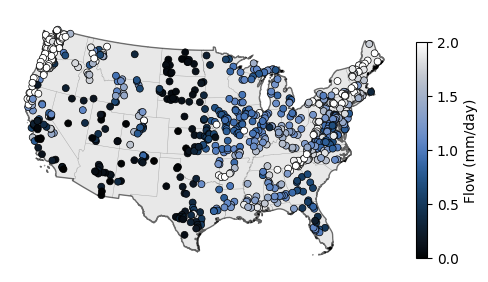

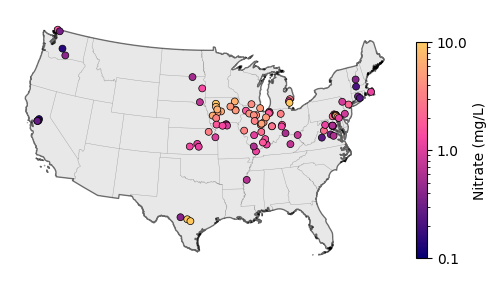

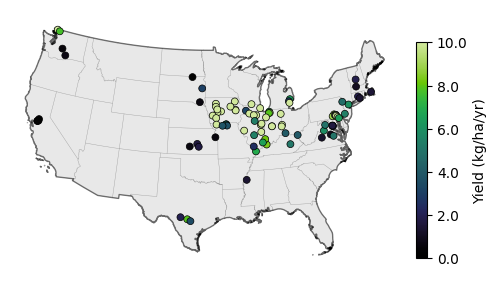

In [4]:
#### Plotting mean nitrate, mean flow and mean yield

for i in ['FlowObs', 'NitrateObs', 'NitrateLoadObs']:

    if i =='FlowObs':
        cmap = cmap_oslo()
        name = 'Flow (mm/day)'
        vmin = 0
        vmax = 2
    elif i =='NitrateObs':
        cmap = cmap_internet()
        name = 'Nitrate (mg/L)'
    elif i =='NitrateLoadObs':
        cmap = cmap_nuclear()
        name = 'Yield (kg/ha/yr)'
        vmin = 0
        vmax = 10
    
    fig, ax = plt.subplots()
    m = Basemap(width=5.5e6, height=4e6, resolution='l', projection='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96)
    states = states.to_crs(Proj(m.proj4string).srs)
    boundary = boundary.to_crs(Proj(m.proj4string).srs)
    x, y = m(globals()[i]['Longitude'].values, globals()[i]['Latitude'].values)
    states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.3, alpha=0.3)
    boundary.plot(ax=ax, edgecolor='black',facecolor='lightgrey', linewidth=1.0, alpha=0.5)
    if (i =='NitrateObs'):
        plt.scatter(x, y, c=globals()[i]['Mean'], s=25, alpha=1.0, cmap=cmap, norm=colors.LogNorm(vmin = 0.1, vmax =10), edgecolors='black',  linewidths=0.5)
    else:
        plt.scatter(x, y, c=globals()[i]['Mean'], s=25, alpha=1.0, cmap=cmap, vmin = vmin, vmax= vmax, edgecolors='black',  linewidths=0.5)
    cbar = plt.colorbar(orientation='vertical',format=FormatStrFormatter('%.1f'), shrink=1.2, pad=0.08)
    cbar.set_label(name, fontsize=10)
    cbar.ax.set_position([0.76, 0.25, 0.0215, 0.45])

    xmin, ymin = m(-120, 20.5)
    xmax, ymax = m(-63, 50)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(labelleft=False, labelbottom=False)
    plt.savefig("D:\\temp\\Output\\"+str(i)+".svg", dpi=300)
    plt.show()
    

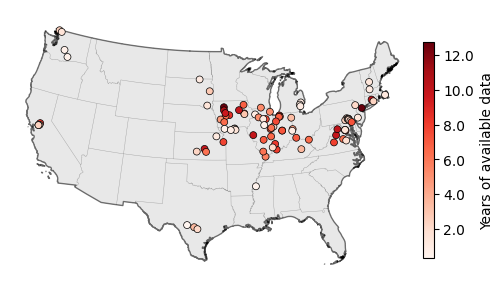

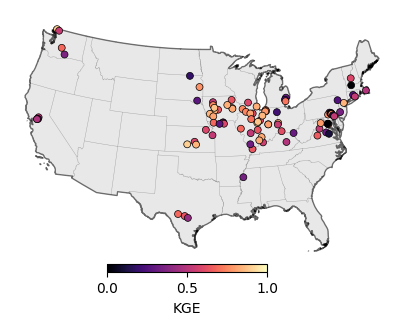

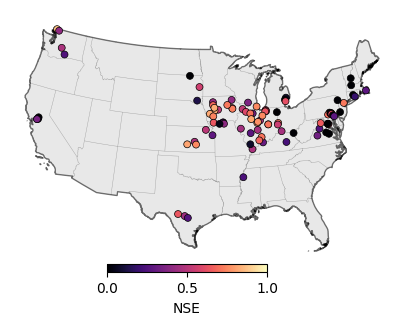

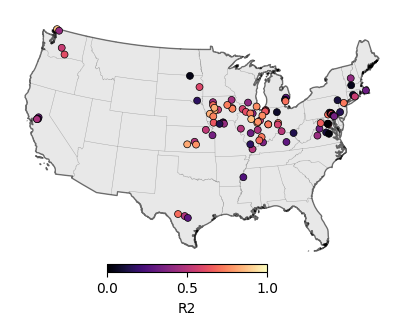

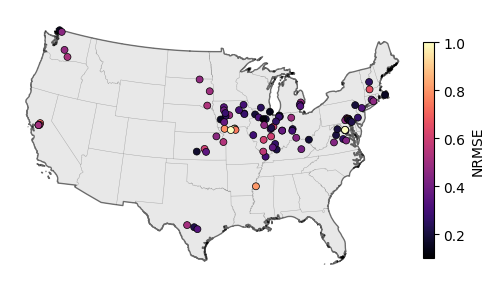

0.59
0.44
0.49
0.628831984


In [5]:
### Plotting spatial Number of years of data, KGE, NSE, R2 and NRMSE
nitrate_metrics.columns=["GageID","N","KGE","NSE","R2","rmse","lat","lon","nan1","nan2","nan3","nan4","nan5","nan6"]
flow_metrics.columns=["GageID","N","KGE","NSE","R2"]

for val in ["N","KGE","NSE","R2", "rmse"]:
    v=val
    fig, ax = plt.subplots()
    m = Basemap(width=5.5e6, height=4e6, resolution='l', projection='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96)
    x, y = m(nitrate_metrics['lon'].values, nitrate_metrics['lat'].values)
#     factor=5
#     size_percentage = merged['N']/factor
#     norm = colors.LogNorm(vmin=0.1, vmax=1) 
    states = states.to_crs(Proj(m.proj4string).srs)
    boundary = boundary.to_crs(Proj(m.proj4string).srs)
    states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.3, alpha=0.3)
    boundary.plot(ax=ax, edgecolor='black',facecolor='lightgrey', linewidth=1.0, alpha=0.5)

    if (val=="rmse"):
        plt.scatter(x, y, c=np.divide(nitrate_metrics['rmse'],NitrateObs['Mean'].reset_index()['Mean']), s=25, cmap='magma', vmin=0.1, vmax=1.0, alpha=1.0, edgecolors='black', linewidths=0.5)
        cbar = plt.colorbar(orientation='vertical',format=FormatStrFormatter('%.1f'), location='right')
        cbar.ax.set_position([0.77, 0.26, 0.25, 0.45])
    elif (val =="N"):
        plt.scatter(x, y, c=nitrate_metrics['N']/365, s=25, cmap='Reds', alpha=1.0, edgecolors='black', linewidths=0.5)
        cbar = plt.colorbar(orientation='vertical',format=FormatStrFormatter('%.1f'), location='right')
        cbar.ax.set_position([0.77, 0.26, 0.25, 0.45])
        
    else:
        plt.scatter(x, y, c=nitrate_metrics[v], s=25, cmap='magma', alpha=1.0, edgecolors='black', vmin=0,vmax=1,  linewidths=0.5)
        cbar = plt.colorbar(orientation='horizontal',format=FormatStrFormatter('%.1f'), location='bottom')
        cbar.ax.set_position([0.37, -0.1, 0.25, 0.45])
    if (val=="rmse"):
        cbar.set_label('NRMSE', fontsize=10)
    elif (val == "N"):
        cbar.set_label('Years of available data', fontsize=10)
    else:
        cbar.set_label(str(v), fontsize=10)
        
    xmin, ymin = m(-120, 20.5)
    xmax, ymax = m(-63, 50)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(labelleft=False, labelbottom=False)   
    plt.savefig("D:\\temp\\Output\\"+str(val)+".svg", dpi=300)
    plt.show()

print(np.nanmedian(nitrate_metrics['KGE']))
print(np.nanmedian(nitrate_metrics['NSE']))
print(np.nanmedian(nitrate_metrics['R2']))
print(np.nanmedian(nitrate_metrics['rmse']))

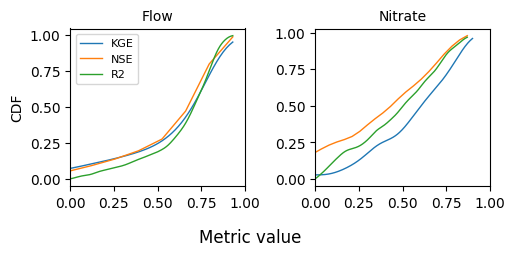

In [11]:
#### Cumulative distribution function CDF for flow and nitrate (smoothing done using gaussian Kernel density estimator (KDE))

fig, (ax1, ax2)= plt.subplots(1,2,figsize=(6, 2.5))
fig.subplots_adjust(left=0.2, bottom=0.25, wspace=0.4)
for i in ['KGE','NSE','R2']:
    data = flow_metrics[i]
    x = np.linspace(min(data), max(data), 1000)
    if(i=='NSE'):
        kde = gaussian_kde(data,bw_method=0.01)
    else:
        kde = gaussian_kde(data,bw_method=0.1)
    cdf = np.array([kde.integrate_box_1d(min(data), val) for val in x])
    ax1.plot(x, cdf, linewidth=1)

ax1.set_ylabel('CDF')
ax1.set_title('Flow', fontsize=10)
ax1.set_xlim(0,1)
ax1.legend(['KGE','NSE','R2'], fontsize=8)

for i in ['KGE','NSE','R2']:
    data = nitrate_metrics[i]
    x = np.linspace(min(data), max(data), 1000)
    if(i=='NSE'):
        kde = gaussian_kde(data,bw_method=0.01)
    else:
        kde = gaussian_kde(data,bw_method=0.1)
    cdf = np.array([kde.integrate_box_1d(min(data), val) for val in x])
    ax2.plot(x, cdf, linewidth=1)

fig.supxlabel('Metric value')
ax2.set_title('Nitrate', fontsize=10)
ax2.set_xlim(0,1)
# plt.savefig("D:\\temp\\CDF_flow.svg", dpi=300)
plt.savefig("D:\\temp\\Output\\CDF.svg", dpi=300)
plt.show()


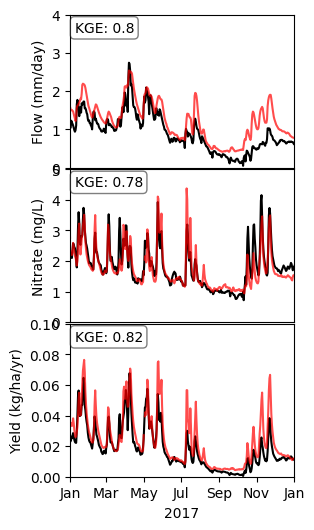

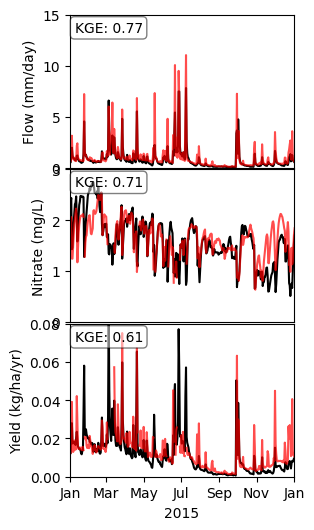

In [22]:
#### Time series plot in Kankakee river, IN and Difficult Run River, VA
year_start=2007
year_end=2022
date_start=str(year_start)+'-01-01'
date_end=str(year_end)+'-12-31'
dates = pd.date_range(start=date_start, end=date_end, freq='D')
Datalen=(len(dates))
    
for i in [5518000, 1646000]:     
    n = Datalen - sum(pd.isna(Nitrateobs[i]))
    fig, axes = plt.subplots(3,1,figsize=(3.2, 6))
    plt.subplots_adjust(hspace=0.01, left=0.2)
    
    for idx, var in enumerate(['Flow', 'Nitrate', 'Nitrateload']):
        ax = axes[idx]
        (globals()[var+'sim'])[i].plot(ax=ax,color='black')
        (globals()[var+'obs'])[i].plot(ax=ax, markersize=3, alpha=0.7, color='red')
        NitrateSO=pd.concat([(globals()[var+'sim'])[i],(globals()[var+'obs'])[i]],axis=1)
        NitrateSO.columns = [0,1]
        NitrateSO=(NitrateSO.dropna())
        kge, NSE, R2, rmse = calcmetrics(NitrateSO[0], NitrateSO[1])
        obs=NitrateSO[1]
        try:
            CV=np.round(obs.std()/obs.mean(),2)
        except:
            CV='NA'
        if i == 1646000:
            ax.set_xlim('2015-01-01','2016-01-01')
            yr = '2015'
            y_limits = {'Flow': (0, 15),'Nitrate': (0, 3),'Nitrateload': (0, 0.08)}
            ax.set_ylim(y_limits[var])

        elif i ==5518000:
            ax.set_xlim('2017-01-01','2018-01-01')
            yr = '2017'
            y_limits = {'Flow': (0, 4),'Nitrate': (0, 5),'Nitrateload': (0, 0.1)}
            ax.set_ylim(y_limits[var])

        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
        if (var != 'Nitrateload'):
            ax.xaxis.set_visible(False)
            ax.tick_params(axis='x', labelbottom=False)
            
        if var =='Flow':
            axlabel = 'Flow (mm/day)'
        elif var =='Nitrate':
            axlabel = 'Nitrate (mg/L)'
        elif var =='Nitrateload':
            axlabel = 'Yield (kg/ha/yr)'
            ax.set_xlabel(yr)
        ax.set_ylabel(axlabel)
        
        box_text_left = f'KGE: {kge}'
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(0.02, 0.96, box_text_left, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=props)
    plt.savefig("D:\\temp\\Output\\TimeSeries_"+str(i)+".svg", dpi=300)
    plt.show()

C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\450519072.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


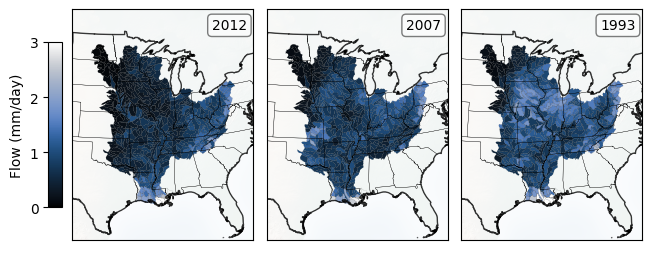

C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\450519072.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


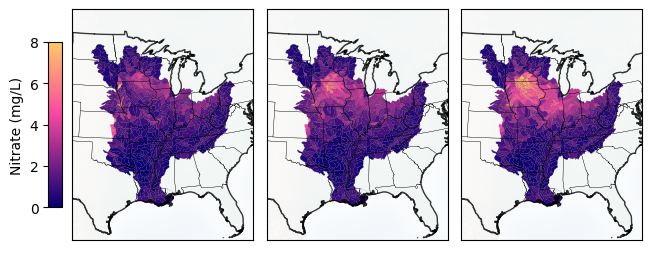

C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\450519072.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


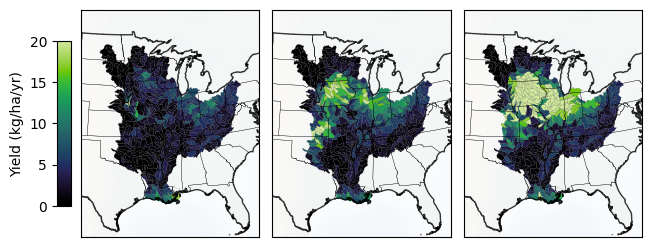

C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\450519072.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


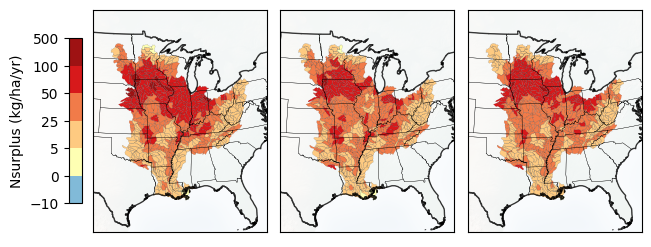

C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\450519072.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


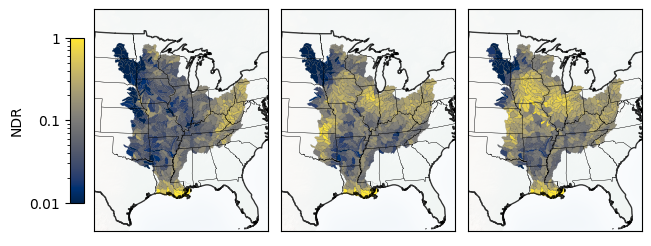

In [9]:
#### MRB model prediction plot for Flow, Nitrate, Yield/Load and NDR for 2012/2007/1993 (dry/normal/wet year)

states = gpd.read_file(main+'/Arena/US/states.shp')
boundary = gpd.read_file(main+'/Arena/US/boundary.shp')
for folder in ['Flowmmday_20', 'Conc_30', 'Load_30','Nsurplus', 'NDR_30']:
    root = main+'/Extra/Predictions/Normalized/'+str(folder)+'/'
    var = root.split('/')[-2][:4]
    if (var =='Flow'):
        varunits = 'mm/day'
        cmap_temp = cmap_oslo()
        vmn = 0
        vmx = 3
    elif (var=='Load'):
        var = 'Yield'
        varunits = 'kg/ha/yr'
        cmap_temp = cmap_nuclear()
        vmn = 0
        vmx = 20
    elif (var=='Conc'):
        var = 'Nitrate'
        varunits = 'mg/L'
        cmap_temp = cmap_internet()
        vmn = 0
        vmx = 8
    elif (var=='Nsur'):
        var = 'Nsurplus'
        varunits = 'kg/ha/yr'
        bounds = [-10, 0, 5, 25, 50, 100, 500 ]  # Load
        colors_list = ['#81bad8', '#feffb3', '#feca81','#f17b49','#d7191b', '#9e1213']  
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(bounds, cmap.N)
        cmap_temp = cmap
        norm_temp = norm
        vmn = None
        vmx = None
    elif (var=='NDR_'):
        var = 'NDR'
        varunits = 'NDR'
        cmap_temp = 'cividis'
        vmn = 0.01
        vmx = 1
        
    shapefile = gpd.read_file(main+'/Extra/Miss_Shapefile.shp')
    shapefile.index=(shapefile['HUC8'].astype(int))

    stations=pd.read_csv(main+"/Extra/Forcing/Attributes.csv")
    stations = (stations[stations['Valid_tSNE_DBSCAN']==1]['HUC8'][:])
    stations=np.sort(stations)
#     stations=stations[~np.isin(stations,[3170009.0, 8090100.0, 4050001.0, 4100004.0, 8090203.0, 8090301.0, 8090302.0, 8080101.0 ,8080103.0, 7120003.0])]

    fig, axes = plt.subplots(1,3, constrained_layout=True)
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)    
    for idx, yrs in enumerate(['2012', '2007', '1993']):
        data = pd.read_csv(root+'Simulated_Compiled.csv')
        data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
        data.index=pd.to_datetime(data['Date'])
        data.drop(columns='Date', inplace=True)
        data[data < 0] = np.nan
        if (var == 'Flow' or var =='Nitrate'):           ## mm/day | kg/km2/yr
            data=data.resample('YE').mean()   
        elif (var=='Yield'):
            data=data.resample('YE').sum()/100           ## kg/km2/yr to kg/ha/yr

        ax = axes[idx]
        data = data[yrs:yrs]
        data=pd.Series(data.mean(), name='Average')
#         data = data.drop(columns = ['8080103', '8080206', '8090301', '8090302', '8090203'])
        data.index=(data.index).astype(int)
        shapefile_sub = shapefile.merge(data, how='left', left_index=True, right_index=True)
        shapefile_sub = shapefile_sub[shapefile_sub.index.isin(stations)]

        m = Basemap(ax= ax, resolution='l', width=5.5e6, height=4e6, projection='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96)
        shapefile_sub = shapefile_sub.to_crs(m.proj4string)
        states = states.to_crs(Proj(m.proj4string).srs)
        boundary = boundary.to_crs(Proj(m.proj4string).srs)
        m.shadedrelief(ax=ax, alpha=0.1)
        shapefile_sub[shapefile_sub['HUC8'].astype(float).isin(stations.astype(float))].boundary.plot(ax=ax, 
                                        color='black', linewidth=0.1, alpha=0.4)
        if (yrs == '2012' and var !='NDR' and var != 'Nsurplus'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=True, vmin=vmn, vmax=vmx,
                                legend_kwds={"label": var+" ("+varunits+")","location":"left","shrink":.35, "aspect":12,"pad":0.03})
        elif (var != 'NDR' and var != 'Nsurplus'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=False, vmin=vmn, vmax=vmx)
        if (yrs == '2012' and var == 'Nsurplus'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, norm=norm_temp, legend=True, vmin=vmn, vmax=vmx,
                                legend_kwds={"label": var+" ("+varunits+")","location":"left","shrink":.35, "aspect":12,"pad":0.03})
        elif (var != 'NDR' and var == 'Nsurplus'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, norm=norm_temp, legend=False, vmin=vmn, vmax=vmx)
        elif (var == 'NDR' and yrs !='2012'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=False, norm=colors.LogNorm(vmin = 0.01, vmax =1.0))
        elif (var == 'NDR' and yrs =='2012'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=False, norm=colors.LogNorm(vmin = 0.01, vmax =1.0), 
                                legend_kwds={"label": "Nitrate Delivery Ratio", "location":"bottom","shrink":.485, "aspect":18,"pad":0.03})
            sm = plt.cm.ScalarMappable(cmap=cmap_temp, norm=colors.LogNorm(vmin=0.01, vmax=1.0))
            cbar = fig.colorbar(sm, ax=ax, shrink=0.35, aspect=12, pad=0.03, location='left')
            def custom_log_formatter(x, pos):
                if x == 0.1:
                    return '0.1'
                elif x == 0.01:
                    return '0.01'
                elif x == 0.001:
                    return '0.001'
                elif x == 1:
                    return '1'
                else:
                    return ''
            cbar.ax.yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
            cbar.set_label(var)
            
        states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.2, alpha=0.9)
        boundary.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1.0, alpha=0.7)

        xmin, ymin = m(-102, 25)
        xmax, ymax = m(-72, 50)
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        box_text_left = str(yrs)
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        if (folder == 'Flowmmday_20'):ax.text(0.77, 0.96, box_text_left, transform=ax.transAxes, verticalalignment='top', horizontalalignment='left', bbox=props)
    plt.savefig(main+"\\Output\\WetDry_"+folder+".svg")
    plt.show()

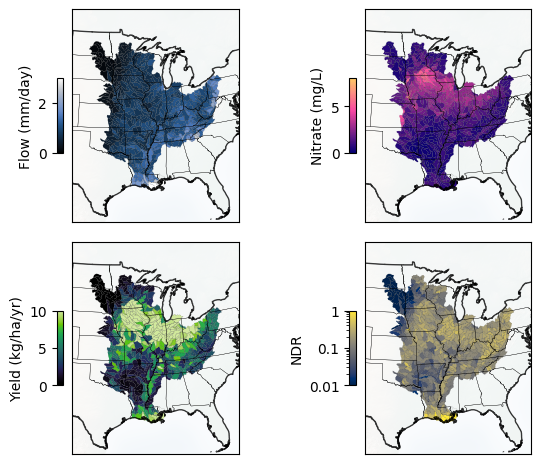

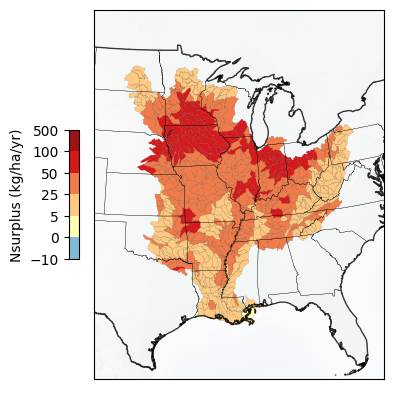

In [8]:
#### MRB model prediction plot for long term average of Flow, Nitrate, Yield/Load and NDR

states = gpd.read_file(main+'/Arena/US/states.shp')
boundary = gpd.read_file(main+'/Arena/US/boundary.shp')

shapefile = gpd.read_file(main+'/Extra/Miss_Shapefile.shp')
shapefile.index=(shapefile['HUC8'].astype(int))

stations=pd.read_csv(main+"/Extra/Forcing/Attributes.csv")
stations = (stations[stations['Valid_tSNE_DBSCAN']==1]['HUC8'][:])
stations=np.sort(stations)
# stations=stations[~np.isin(stations,[3170009.0, 8090100.0, 4050001.0, 4100004.0, 8090203.0, 8090301.0, 8090302.0, 8080101.0 ,8080103.0, 7120003.0])]


fig, axes = plt.subplots(2,2)
fig.subplots_adjust()    
for idx, folder in enumerate(['Flowmmday_20', 'Conc_30', 'Load_30', 'NDR_30', 'Nsurplus']):    ### Nsurplus plotted at the end
    root = main+'/Extra/Predictions/Normalized/'+str(folder)+'/'
    var = root.split('/')[-2][:4]
    if (var =='Flow'):
        varunits = 'mm/day'
        cmap_temp = cmap_oslo()
        norm_temp = None
        vmn = 0
        vmx = 3
    elif (var=='Load'):
        var = 'Yield'
        varunits = 'kg/ha/yr'
        cmap_temp = cmap_nuclear()
        norm_temp = None
        vmn = 0
        vmx = 10
    elif (var=='Conc'):
        var = 'Nitrate'
        varunits = 'mg/L'
        cmap_temp = cmap_internet()
        norm_temp = None
        vmn = 0
        vmx = 8
    elif (var=='Nsur'):
        plt.tight_layout()
        plt.savefig(main+"\\Output\\Avg_Flow_Conc_load_NDR.svg")
        plt.show()     #2*2 subplot terminates and a new plot for Nsurplus begins here
        fig, ax = plt.subplots()
        var = 'Nsurplus'
        varunits = 'kg/ha/yr'
        bounds = [-10, 0, 5, 25, 50, 100, 500 ]  # Load
        colors_list = ['#81bad8', '#feffb3', '#feca81','#f17b49','#d7191b', '#9e1213']  
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(bounds, cmap.N)
        cmap_temp = cmap
        norm_temp = norm
        vmn = None
        vmx = None
    elif (var=='NDR_'):
        var = 'NDR'
        varunits = 'NDR'
        cmap_temp = 'cividis'
        norm_temp = None
        vmn = 0.01
        vmx = 1

    data = pd.read_csv(root+'Simulated_Compiled.csv')
    data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    data.index=pd.to_datetime(data['Date'])
    data.drop(columns='Date', inplace=True)
    data[data < 0] = np.nan
    if (var == 'Flow' or var =='Nitrate'):           ## mm/day | kg/km2/yr
        data=data.resample('YE').mean()   
    elif (var=='Yield'):
        data=data.resample('YE').sum()/100           ## kg/km2/yr to kg/ha/yr

    if (var == 'Yield'):
        ndr = pd.read_csv(main+'/Extra/Predictions/Normalized/NDR_30/Simulated_Compiled.csv')
        ndr.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
        ndr.index=pd.to_datetime(ndr['Date'])
        ndr.drop(columns='Date', inplace=True)
        ndr[ndr < 0] = np.nan

    row, col = divmod(idx, 2)
    if (var != 'Nsurplus'):ax = axes[row, col]
    data=pd.Series(data.mean(), name='Average')
#     data = data.drop(columns = ['8080103', '8080206', '8090301', '8090302', '8090203'])
    data.index=(data.index).astype(int)
    shapefile_sub = shapefile.merge(data, how='left', left_index=True, right_index=True)
    shapefile_sub = shapefile_sub[shapefile_sub.index.isin(stations)]

    m = Basemap(ax= ax, resolution='l', width=5.5e6, height=4e6, projection='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96)
    shapefile_sub = shapefile_sub.to_crs(m.proj4string)
    states = states.to_crs(Proj(m.proj4string).srs)
    boundary = boundary.to_crs(Proj(m.proj4string).srs)
    m.shadedrelief(ax=ax, alpha=0.1)
    shapefile_sub[shapefile_sub['HUC8'].astype(float).isin(stations.astype(float))].boundary.plot(ax=ax, 
                                    color='black', linewidth=0.1, alpha=0.4)
    if (var !='NDR' and var != 'Nsurplus'):
        shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=True, vmin=vmn, vmax=vmx,
                                   legend_kwds={"label": var+" ("+varunits+")","location":"left","shrink":.35, "aspect":12,"pad":0.03})
    elif (var !='NDR' and var == 'Nsurplus'):
        shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, norm=norm_temp, legend=True, vmin=vmn, vmax=vmx,
                                   legend_kwds={"label": var+" ("+varunits+")","location":"left","shrink":.35, "aspect":12,"pad":0.03})
    else:
        shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=False, norm=colors.LogNorm(vmin = 0.01, vmax =1.0))
        sm = plt.cm.ScalarMappable(cmap=cmap_temp, norm=colors.LogNorm(vmin=0.01, vmax=1.0))
        cbar = fig.colorbar(sm, ax=ax, shrink=0.35, aspect=12, pad=0.03, location='left')
        def custom_log_formatter(x, pos):
            if x == 0.1:
                return '0.1'
            elif x == 0.01:
                return '0.01'
            elif x == 0.001:
                return '0.001'
            elif x == 1:
                return '1'
            else:
                return ''
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
        cbar.set_label(var)
    states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.2, alpha=0.9)
    boundary.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1.0, alpha=0.7)

    xmin, ymin = m(-102, 25)
    xmax, ymax = m(-72, 50)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
#     box_text_left = str(yrs)
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.savefig(main+"\\Output\\Avg_"+folder+".svg")
plt.show()

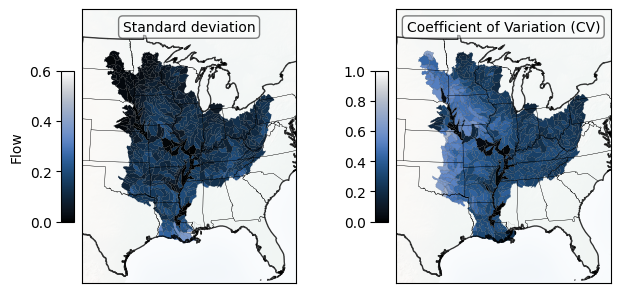

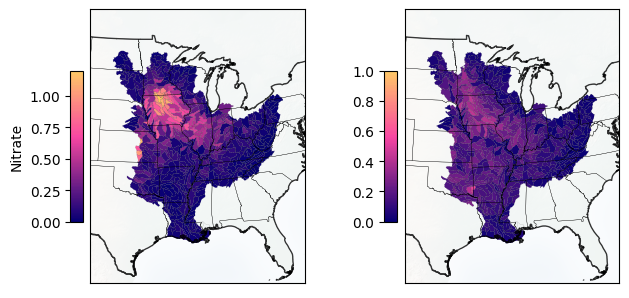

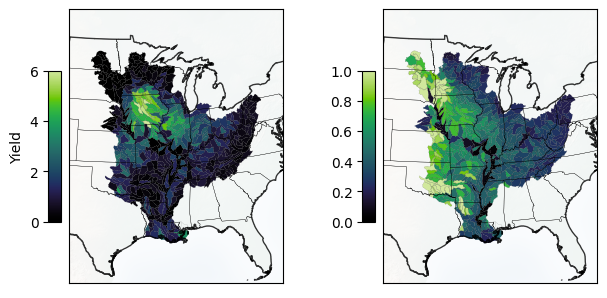

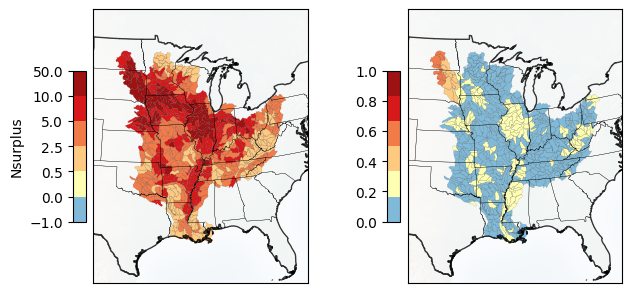

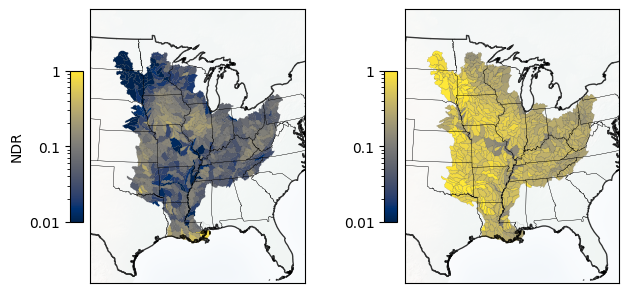

In [10]:
#### MRB model prediction plot for Standard deviation and CV for Flow, Nitrate, Yield/Load and NDR

states = gpd.read_file(main+'/Arena/US/states.shp')
boundary = gpd.read_file(main+'/Arena/US/boundary.shp')
for folder in ['Flowmmday_20', 'Conc_30', 'Load_30', 'Nsurplus', 'NDR_30']:
    root = main+'/Extra/Predictions/Normalized/'+str(folder)+'/'
    var = root.split('/')[-2][:4]
    if (var =='Flow'):
        varunits = 'mm/day'
        cmap_temp = cmap_oslo()
        norm_temp = None
        vmn = 0
        vmx = 0.6
    elif (var=='Load'):
        var = 'Yield'
        varunits = 'kg/ha/yr'
        cmap_temp = cmap_nuclear()
        norm_temp = None
        vmn = 0
        vmx = 6
    elif (var=='Conc'):
        var = 'Nitrate'
        varunits = 'mg/L'
        cmap_temp = cmap_internet()
        norm_temp = None
        vmn = 0
        vmx = 1.2
    elif (var=='Nsur'):
        var = 'Nsurplus'
        varunits = 'kg/ha/yr'
        bounds = [-1, 0, 0.5, 2.5, 5, 10, 50 ]  # Load
        colors_list = ['#81bad8', '#feffb3', '#feca81','#f17b49','#d7191b', '#9e1213']  
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(bounds, cmap.N)
        cmap_temp = cmap
        norm_temp = norm
        vmn = None
        vmx = None
    elif (var=='NDR_'):
        var = 'NDR'
        varunits = 'NDR'
        cmap_temp = 'cividis'
        norm_temp = None
        vmn = 0.01
        vmx = 1
        
    shapefile = gpd.read_file(main+'/Extra/Miss_Shapefile.shp')
    shapefile.index=(shapefile['HUC8'].astype(int))

    stations=pd.read_csv(main+"/Extra/Forcing/Attributes.csv")
    stations = (stations[stations['Valid_tSNE_DBSCAN']==1]['HUC8'][:])
    stations=np.sort(stations)
#     stations=stations[~np.isin(stations,[3170009.0, 8090100.0, 4050001.0, 4100004.0, 8090203.0, 8090301.0, 8090302.0, 8080101.0 ,8080103.0, 7120003.0])]

    fig, axes = plt.subplots(1,2, constrained_layout=False)
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)    
    for idx, mystat in enumerate(['Standard deviation', 'Coefficient of Variation (CV)']):
        data = pd.read_csv(root+'Simulated_Compiled.csv')
        data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
        data.index=pd.to_datetime(data['Date'])
        data.drop(columns='Date', inplace=True)
        data[data < 0] = np.nan
        if (var == 'Flow' or var =='Nitrate'):           ## mm/day | kg/km2/yr
            data=data.resample('YE').mean()   
        elif (var=='Yield'):
            data=data.resample('YE').sum()/100           ## kg/km2/yr to kg/ha/yr

#         if (var == 'Yield'):
#             ndr = pd.read_csv(main+'/Extra/Predictions/Normalized/NDR_30/Simulated_Compiled.csv')
#             ndr.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
#             ndr.index=pd.to_datetime(ndr['Date'])
#             ndr.drop(columns='Date', inplace=True)
#             ndr[ndr < 0] = np.nan

#             Nsurplus = (data/ndr)          ### Inverse calculate from ndr and export to get N surplus
#             Nsurplus = Nsurplus.loc[:'2017']
            
        ax = axes[idx]
        if (mystat == 'Standard deviation'):
            data=pd.Series(data.std(), name='Average')
        elif (mystat == 'Coefficient of Variation (CV)'):
            data=pd.Series(np.divide(data.std(),data.mean()), name='Average')
            vmn = 0
            vmx = 1
#         data = data.drop(columns = ['8080103', '8080206', '8090301', '8090302', '8090203'])
        data.index=(data.index).astype(int)
        shapefile_sub = shapefile.merge(data, how='left', left_index=True, right_index=True)
        shapefile_sub = shapefile_sub[shapefile_sub.index.isin(stations)]

        m = Basemap(ax= ax, resolution='l', width=5.5e6, height=4e6, projection='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96)
        shapefile_sub = shapefile_sub.to_crs(m.proj4string)
        states = states.to_crs(Proj(m.proj4string).srs)
        boundary = boundary.to_crs(Proj(m.proj4string).srs)
        m.shadedrelief(ax=ax, alpha=0.1)
        shapefile_sub[shapefile_sub['HUC8'].astype(float).isin(stations.astype(float))].boundary.plot(ax=ax, 
                                        color='black', linewidth=0.1, alpha=0.4)
        if (var !='NDR' and mystat =='Standard deviation'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, norm=norm_temp, legend=True, vmin=vmn, vmax=vmx,
                                legend_kwds={"label": var,"location":"left","shrink":.35, "aspect":12,"pad":0.03})
        if (var !='NDR' and mystat == 'Coefficient of Variation (CV)'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=True, vmin=vmn, vmax=vmx,
                                legend_kwds={"location":"left","shrink":.35, "aspect":12,"pad":0.03})
        elif (var == 'NDR'):
            shapefile_sub.plot(ax = ax, column='Average', cmap=cmap_temp, legend=False, norm=colors.LogNorm(vmin = 0.01, vmax =1.0), 
                                legend_kwds={"label": "Nitrate Delivery Ratio", "location":"left","shrink":.35, "aspect":12,"pad":0.03})
            sm = plt.cm.ScalarMappable(cmap=cmap_temp, norm=colors.LogNorm(vmin=0.01, vmax=1.0))
            cbar = fig.colorbar(sm, ax=ax, shrink=0.35, aspect=12, pad=0.03, location='left')
            def custom_log_formatter(x, pos):
                if x == 0.1:
                    return '0.1'
                elif x == 0.01:
                    return '0.01'
                elif x == 0.001:
                    return '0.001'
                elif x == 1:
                    return '1'
                else:
                    return ''
            cbar.ax.yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
            if (mystat == 'Standard deviation'):
                cbar.set_label(var)
            
        states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.2, alpha=0.9)
        boundary.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1.0, alpha=0.7)

        xmin, ymin = m(-102, 25)
        xmax, ymax = m(-72, 50)
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        box_text_left = mystat
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        if (folder == 'Flowmmday_20'):ax.text(0.5, 0.96, box_text_left, transform=ax.transAxes, verticalalignment='top', horizontalalignment='center', bbox=props)
    plt.savefig(main+"\\Output\\Stat_"+folder+".svg")
    plt.show()

In [4]:
################# Code to calculate Nitrogen Delivery Ratio. Wont run at the moment

stations=pd.read_csv(main+"/Extra/Forcing/Attributes.csv")
stations = (stations[stations['Valid_tSNE_DBSCAN']==1]['HUC8'][:])
stations=np.sort(stations)

data = pd.read_csv(main+'/Extra/Predictions/Normalized/Load_30/Simulated_Compiled.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data.index=pd.to_datetime(data['Date'])
data.drop(columns='Date', inplace=True)
data[data < 0] = np.nan

data=data.resample('YE').sum()/100                         ##yield converted from kg/km2/yr to kg/ha/yr
print('Reading done')

averageNDR=pd.DataFrame()

Nsurp = pd.read_csv(main+"/Extra/TREND/NSurp_Components/NSurplus.txt")
shapefile_main = gpd.read_file(main+'/Extra/Miss_Shapefile.shp')

county_shapefile = gpd.read_file(main+"/Extra/TREND/County_Boundaries/Byrnesetal_TREND_CountyBoundaries.shp")
county_shapefile['GEOID'] = (county_shapefile['GEOID'].astype(int))
county_shapefile = county_shapefile.merge(Nsurp, how='left', left_on='GEOID', right_on='GEOID')

shapefile_main = shapefile_main.to_crs(county_shapefile.crs)
images=[]

for years in range(1980,2018):
    print(years)
    county_shapefile['y'+str(years)] = (county_shapefile['y'+str(years)])             ### kg/ha retained as is
    pixel_size = 500   #500 meters pixel size leads to 200 MB raster
    bounds = county_shapefile.total_bounds  # Get the bounding box of the shapefile
    width = int((bounds[2] - bounds[0]) / pixel_size)
    height = int((bounds[3] - bounds[1]) / pixel_size)
    transform = from_origin(bounds[0], bounds[3], pixel_size, pixel_size)
    raster = np.zeros((height, width), dtype=rasterio.float32)
    # Rasterize the county shapefile
    shapes = ((geom, value) for geom, value in zip(county_shapefile.geometry, county_shapefile['y'+str(years)]))
    raster = rasterize(shapes=shapes, out_shape=raster.shape, transform=transform, fill=0, dtype=rasterio.float32)

    # Save the raster to a file
    with rasterio.open(
        main+'/temp/county_raster.tif', 'w', driver='GTiff',
        height=raster.shape[0], width=raster.shape[1],
        count=1, dtype=rasterio.float32,
        crs=county_shapefile.crs.to_string(),
        transform=transform,
    ) as dst:
        dst.write(raster, 1)

    zs = zonal_stats(shapefile_main, main+'/temp/county_raster.tif', stats='mean')
    zs_df = pd.DataFrame(zs)
    shapefile = shapefile_main.merge(zs_df['mean'], how='left', left_index=True, right_index=True)

    datasub = data[data.index==str(years)+'-12-31'].transpose()
    datasub.index=(datasub.index).astype(int)
    shapefile.index = shapefile['HUC8'].astype(int)
    averageNDR['Nsurplus_kg_ha_'+str(years)] = shapefile['mean']            #### Nsurplus
    averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
    averageNDR['NDR_'+str(years)] = datasub[str(years)+'-12-31']/shapefile['mean']       ### NDR
    shapefile['y'+str(years)] = datasub[str(years)+'-12-31']/shapefile['mean']          ### Plot

#     fig, ax = plt.subplots()
#     fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
#     m = Basemap(width=5.5e6, height=4e6, projection='aea', lat_1=29.5, lat_2=45.5, lat_0=38.5, lon_0=-96)
#     shapefile = shapefile.to_crs(m.proj4string)
#     shapefile_sub = shapefile.merge(datasub, how='left', left_index=True, right_index=True)
#     shapefile_sub[shapefile_sub['HUC8'].astype(float).isin(stations.astype(float))].boundary.plot(ax=ax, 
#                                 color='black', linewidth=0.1, alpha=0.4)
#     shapefile.plot(column='y'+str(years), cmap='cividis', ax=ax,  legend=False, norm=colors.LogNorm(vmin = 0.01, vmax =1.0), 
#                legend_kwds={"label": "Nitrate Delivery Ratio",
#                                 "location":"bottom",
#                                 "shrink":.485, "aspect":18,
#                                 "pad":0.03})
#     sm = plt.cm.ScalarMappable(cmap='cividis', norm=colors.LogNorm(vmin=0.01, vmax=1.0))
#     cbar = fig.colorbar(sm, ax=ax, shrink=0.485, aspect=18, pad=-0.2, location='left')
#     def custom_log_formatter(x, pos):
#         if x == 0.1:
#             return '0.1'
#         elif x == 0.01:
#             return '0.01'
#         elif x == 0.001:
#             return '0.001'
#         elif x == 1:
#             return '1'
#         else:
#             return ''
#     cbar.ax.yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
#     states = states.to_crs(Proj(m.proj4string).srs)
#     boundary = boundary.to_crs(Proj(m.proj4string).srs)
#     m.shadedrelief(alpha=0.1)
#     states.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.2, alpha=0.9)
#     boundary.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1.0, alpha=0.7)
#     xmin, ymin = m(-102, 25)
#     xmax, ymax = m(-72, 50)
#     ax.set_xlim([xmin, xmax])
#     ax.set_ylim([ymin, ymax])
#     filename = "temp/time/NDR_"+str(years)+".jpg"
# #     plt.savefig(filename, dpi=300)
#     plt.show()

averageNDR.to_excel(main+"/Extra/TREND/NDR.xlsx")

Reading done
1980


C:\Users\A ayush\AppData\Roaming\Python\Python310\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['NDR'+str(years)] = datasub[str(years)+'-12-31']/shapefile['mean']       ### NDR


2014


C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nsurplus_kg_ha_'+str(years)] = shapefile['mean']            #### Nsurplus
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is us

2015


C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nsurplus_kg_ha_'+str(years)] = shapefile['mean']            #### Nsurplus
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is us

2016


C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nsurplus_kg_ha_'+str(years)] = shapefile['mean']            #### Nsurplus
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is us

2017


C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nsurplus_kg_ha_'+str(years)] = shapefile['mean']            #### Nsurplus
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  averageNDR['Nexport_kg_ha_'+str(years)] = datasub[str(years)+'-12-31']  #### N export
C:\Users\A ayush\AppData\Local\Temp\ipykernel_3896\2337333728.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is us